In [1]:
%matplotlib inline
import seaborn
import numpy, scipy, matplotlib.pyplot as plt, IPython.display as ipd
import librosa, librosa.display
plt.rcParams['figure.figsize'] = (13, 5)

In [2]:
x, sr = librosa.load('audio/classic_rock_beat.wav')
print (x.shape, sr)

(151521,) 22050


In [3]:
ipd.Audio(x, rate=sr)

In [4]:
hop_length = 512
onset_frames = librosa.onset.onset_detect(x, sr=sr, hop_length=hop_length)
print (onset_frames) # frame numbers of estimated onsets

[ 20  29  38  57  66  75  84  93 103 112 121 131 140 149 158 167 176 185
 196 204 213 232 241 250 260 269 278 288]


In [5]:
onset_frames.size

28

In [6]:
onset_times = librosa.frames_to_time(onset_frames, sr=sr, hop_length=hop_length)
print (onset_times)

[0.46439909 0.67337868 0.88235828 1.32353741 1.53251701 1.7414966
 1.95047619 2.15945578 2.39165533 2.60063492 2.80961451 3.04181406
 3.25079365 3.45977324 3.66875283 3.87773243 4.08671202 4.29569161
 4.55111111 4.73687075 4.94585034 5.38702948 5.59600907 5.80498866
 6.03718821 6.2461678  6.45514739 6.68734694]


In [7]:
onset_samples = librosa.frames_to_samples(onset_frames, hop_length=hop_length)
print (onset_samples)

[ 10240  14848  19456  29184  33792  38400  43008  47616  52736  57344
  61952  67072  71680  76288  80896  85504  90112  94720 100352 104448
 109056 118784 123392 128000 133120 137728 142336 147456]


E:\Kameswar\Anaconda3\lib\site-packages\librosa\core\spectrum.py:958: UserWarning: amplitude_to_db was called on complex input so phase information will be discarded. To suppress this warning, call amplitude_to_db(magphase(D)[0]) instead.
  warnings.warn('amplitude_to_db was called on complex input so phase '


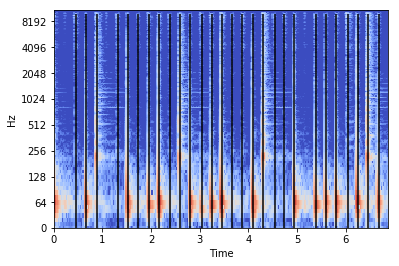

In [8]:
S = librosa.stft(x)
logS = librosa.amplitude_to_db(S)
librosa.display.specshow(logS, sr=sr, x_axis='time', y_axis='log')
plt.vlines(onset_times, 0, 10000, color='k')

In [9]:
def concatenate_segments(x, onset_samples, pad_duration=0.500):
    """Concatenate segments into one signal."""
    silence = numpy.zeros(int(pad_duration*sr)) # silence
    frame_sz = min(numpy.diff(onset_samples))   # every segment has uniform frame size
    return numpy.concatenate([
        numpy.concatenate([x[i:i+frame_sz], silence]) # pad segment with silence
        for i in onset_samples
    ])

In [10]:
concatenated_signal = concatenate_segments(x, onset_samples, 0.500)

In [11]:
ipd.Audio(concatenated_signal, rate=sr)

In [12]:
onset_frames = librosa.onset.onset_detect(x, sr=sr, hop_length=hop_length, backtrack=True)

In [13]:
print (onset_frames)
onset_frames.size

[ 17  26  37  54  62  74  81  92 102 109 118 128 138 145 157 165 174 184
 194 202 212 229 240 249 258 267 276 286]


28

In [14]:
onset_times = librosa.frames_to_time(onset_frames, sr=sr, hop_length=hop_length)

In [15]:
onset_samples = librosa.frames_to_samples(onset_frames, hop_length=hop_length)

E:\Kameswar\Anaconda3\lib\site-packages\librosa\core\spectrum.py:958: UserWarning: amplitude_to_db was called on complex input so phase information will be discarded. To suppress this warning, call amplitude_to_db(magphase(D)[0]) instead.
  warnings.warn('amplitude_to_db was called on complex input so phase '


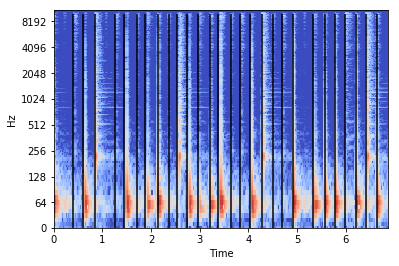

In [16]:
S = librosa.stft(x)
logS = librosa.amplitude_to_db(S)
librosa.display.specshow(logS, sr=sr, x_axis='time', y_axis='log')
plt.vlines(onset_times, 0, 10000, color='k')

In [17]:
concatenated_signal = concatenate_segments(x, onset_samples, 0.500)

In [18]:
ipd.Audio(concatenated_signal, rate=sr)

In [19]:
ls audio

 Volume in drive C is Windows
 Volume Serial Number is AE10-1764

 Directory of C:\Users\Kameswar\Documents\Data Science\stanford_mir\audio

22-Jun-18  12:11 PM    <DIR>          .
22-Jun-18  12:11 PM    <DIR>          ..
22-Jun-18  12:11 PM           338,732 125_bounce.wav
22-Jun-18  12:11 PM           364,972 58bpm.wav
22-Jun-18  12:11 PM           911,360 brahms_hungarian_dance_5.mp3
22-Jun-18  12:11 PM         1,022,537 busta_rhymes_hits_for_days.mp3
22-Jun-18  12:11 PM           204,844 c_strum.wav
22-Jun-18  12:11 PM           102,816 clarinet_c6.wav
22-Jun-18  12:11 PM           111,221 classic_rock_beat.mp3
22-Jun-18  12:11 PM           303,086 classic_rock_beat.wav
22-Jun-18  12:11 PM           192,470 conga_groove.wav
22-Jun-18  12:11 PM    <DIR>          drum_samples
22-Jun-18  12:11 PM            71,680 funk_groove.mp3
22-Jun-18  12:11 PM            64,366 jangle_pop.mp3
22-Jun-18  12:11 PM            71,471 latin_groove.mp3
22-Jun-18  12:11 PM            47,294 oboe_c6.wav